In [1]:
import numpy as np
import imageio
from scipy import misc
import string

In [2]:
meta_words = '/Users/arushigupta/Desktop/IAM/ascii/words.txt'
word_l =[]
loc_l = []
info = open(meta_words, "r")
for li in info:
    if li.startswith('#'):
        print(li)
    else:
        #print(li.split(' '))
        li_sp = li.split(' ')
        #print(li_sp[8].strip())
        addr = li_sp[0].split('-')
        to_word = '/Users/arushigupta/Desktop/IAM/words/'
        to_word += addr[0] + '/'
        to_word += addr[0] + '-' + addr[1] + '/'
        to_word += addr[0] + '-' + addr[1] + '-' + addr[2] + '-' + addr[3] + '.png'
        #print(to_word)
        word_l.append(li_sp[8].strip())
        loc_l.append(to_word.strip())
info.close()

#--- words.txt ---------------------------------------------------------------#

#

# iam database word information

#

# format: a01-000u-00-00 ok 154 1 408 768 27 51 AT A

#

#     a01-000u-00-00  -> word id for line 00 in form a01-000u

#     ok              -> result of word segmentation

#                            ok: word was correctly

#                            er: segmentation of word can be bad

#

#     154             -> graylevel to binarize the line containing this word

#     1               -> number of components for this word

#     408 768 27 51   -> bounding box around this word in x,y,w,h format

#     AT              -> the grammatical tag for this word, see the

#                        file tagset.txt for an explanation

#     A               -> the transcription for this word

#



In [3]:
word_l

['A',
 'MOVE',
 'to',
 'stop',
 'Mr.',
 'Gaitskell',
 'from',
 'nominating',
 'any',
 'more',
 'Labour',
 'life',
 'Peers',
 'is',
 'to',
 'be',
 'made',
 'at',
 'a',
 'meeting',
 'of',
 'Labour',
 'M',
 'tomorrow',
 '.',
 'Mr.',
 'Michael',
 'Foot',
 'has',
 'put',
 'down',
 'a',
 'resolution',
 'on',
 'the',
 'subject',
 'and',
 'he',
 'is',
 'to',
 'be',
 'backed',
 'by',
 'Mr.',
 'Will',
 'Griffiths',
 ',',
 'M',
 'for',
 'Manchester',
 'Exchange',
 '.',
 'A',
 'MOVE',
 'to',
 'stop',
 'Mr.',
 'Gaitskell',
 'from',
 'nominating',
 'any',
 'more',
 'Labour',
 'life',
 'Peers',
 'is',
 'to',
 'be',
 'made',
 'at',
 'a',
 'meeting',
 'of',
 'Labour',
 '0M',
 'tomorrow',
 '.',
 'Mr.',
 'Michael',
 'Foot',
 'has',
 'put',
 'down',
 'a',
 'resolution',
 'on',
 'the',
 'subject',
 'and',
 'he',
 'is',
 'to',
 'be',
 'backed',
 'by',
 'Mr.',
 'Will',
 'Griffiths',
 ',',
 '0M',
 'for',
 'Manchester',
 'Exchange',
 '.',
 'Though',
 'they',
 'may',
 'gather',
 'some',
 'Left-wing',
 'support'

In [4]:
#find out how many different words we have
word_dict = {}
for ent in word_l:
    if ent in word_dict:
        word_dict[ent] += 1.0
    else:
        word_dict[ent] = 0.0

In [5]:
word_dict['a']
#ok we're going to pick the most common 50 words
#were gonna get rid of punctuation

common_words = sorted(word_dict, key=word_dict.get, reverse=True)[:30]

common_word_no_punc = []
for word in common_words:
    if word not in string.punctuation:
        common_word_no_punc.append(word)
        
common_word_no_punc
num_words = len(common_word_no_punc)
common_word_no_punc

['the',
 'of',
 'to',
 'and',
 'a',
 'in',
 'was',
 'that',
 'is',
 'he',
 'for',
 'I',
 'with',
 'had',
 'be',
 'his',
 'it',
 'as',
 'on',
 'The',
 'at',
 'by',
 'not',
 'which',
 'have',
 'but']

In [6]:
'-' in string.punctuation

True

In [7]:
loc_l
img = imageio.imread('/Users/arushigupta/Desktop/IAM/words/a01/a01-000u/a01-000u-00-03.png')
np.shape(img)

(78, 166)

In [8]:
img2 = np.pad(img, [(2, 3), (5,5)], mode = "constant", constant_values = 0)
print(np.shape(img2))

(83, 176)


In [9]:

j = 0

data_words = []
data_locs = []



for imp in loc_l:
    if imp != '/Users/arushigupta/Desktop/IAM/words/a01/a01-117/a01-117-05-02.png' and imp != '/Users/arushigupta/Desktop/IAM/words/a01/a01-117/a01-117-00-02.png' and imp != '/Users/arushigupta/Desktop/IAM/words/r06/r06-022/r06-022-03-05.png':
        if word_l[j] in common_word_no_punc:
            data_words.append(word_l[j])
            data_locs.append(imp)
        
    j += 1        
        

In [10]:
#actually we're just gonna find max width and heigth for the words we choose 

max_width = 0
max_height = 0
j = 0


for imp in data_locs:
    
    img = misc.imread(imp)
    sh = np.shape(img)
    wi = sh[0]
    hi = sh[1]
    if wi > max_width:
        max_width = wi
    if hi > max_height:    
        max_height = hi
    j += 1        
        
        
print(max_width)
print(max_height)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


231
1934


In [11]:
#pad the images to max height and width
from keras.applications.resnet50 import ResNet50
from keras.layers import Input, Conv2D, Dense, Activation, BatchNormalization, merge, AveragePooling2D, Flatten, MaxPooling2D
from keras.models import Sequential
from keras import Model
from keras.datasets import cifar10, mnist
from random import shuffle
from math import floor, ceil
from matplotlib import pyplot as plt
from keras.optimizers import Adam
from keras.models import load_model

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
mod = ResNet50(include_top = True, weights = None, input_shape = (max_width, max_height, 1))

In [172]:
print(mod.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 231, 1934, 1) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 116, 967, 64) 3200        input_4[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 116, 967, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_101 (Activation)     (None, 116, 967, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [173]:
top_model = Dense(num_words)
top_modelII = Activation('softmax')
#top_model.add(Dense(num_words))
model = Model(inputs=mod.input, outputs=top_model(mod.output))
modelII = Model(inputs=model.input, outputs=top_modelII(model.output))
print(modelII.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 231, 1934, 1) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 116, 967, 64) 3200        input_4[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 116, 967, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_101 (Activation)     (None, 116, 967, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [12]:
#our labels are gonna be one-hot
sorted(common_word_no_punc)
hot_ind = {}
k = 0
for word in sorted(common_word_no_punc):
    hot_ind[word] = k 
    k += 1
    
hot_ind

{'I': 0,
 'The': 1,
 'a': 2,
 'and': 3,
 'as': 4,
 'at': 5,
 'be': 6,
 'but': 7,
 'by': 8,
 'for': 9,
 'had': 10,
 'have': 11,
 'he': 12,
 'his': 13,
 'in': 14,
 'is': 15,
 'it': 16,
 'not': 17,
 'of': 18,
 'on': 19,
 'that': 20,
 'the': 21,
 'to': 22,
 'was': 23,
 'which': 24,
 'with': 25}

In [13]:
#ok so modelII is our model
#now we pad the data and start training
#if we can load all the data into memory we can use the keras image generator....


#shuffle the data

def my_batch_generator(batch_size, data_words, data_locs):
    #print(data_words)
    l = len(data_words)
    print(l)
    inds = np.arange(l)
    np.random.shuffle(inds)
    data_words = np.reshape( data_words, (l,1))
    data_locs = np.reshape( data_locs, (l,1))
    data_words = data_words[inds]
    data_locs = data_locs[inds]
    i = 0
    X_train = []
    y_train = []
    while True:
        #load the image
        if i > l-1:
            i = 0
            inds = np.arange(l)
            np.random.shuffle(inds)
            data_words = np.reshape( data_words, (l,1))
            data_locs = np.reshape( data_locs, (l,1))
            data_words = data_words[inds]
            data_locs = data_locs[inds]
            
        path = data_locs[i][0]
        #print(path)
        img = misc.imread(path)
        lab = data_words[i][0]
        im_w = np.shape(img)[0]
        im_h = np.shape(img)[1]
        pad_0_l = ceil((max_width - im_w)/2.0)
        pad_0_r = floor((max_width - im_w)/2.0)
        pad_1_l  = ceil((max_height - im_h)/2.0)
        pad_1_r = floor((max_height - im_h)/2.0)
        padded_img =  np.pad(img, [(pad_0_l, pad_0_r),(pad_1_l, pad_1_r)], mode = 'constant', constant_values = 0)
        hot_lab = np.zeros(( len(hot_ind.keys()) , ))
        labl = hot_ind[lab]
        #print(labl)
        hot_lab[labl] = 1
        X_train.append(padded_img)
        y_train.append(hot_lab)
        i +=1
        if i % batch_size == 0:
            X_train = np.reshape(X_train, (batch_size, max_width, max_height, 1))
            y_train = np.reshape(y_train, (batch_size, len(hot_ind.keys())))
            yield X_train, y_train
            X_train = []
            y_train = []


In [14]:
data_locs[0]

'/Users/arushigupta/Desktop/IAM/words/a01/a01-000u/a01-000u-00-02.png'

In [15]:
l = len(data_locs)
data_words = np.reshape( data_words, (l,1))
data_locs = np.reshape( data_locs, (l,1))
#split up data words and locs
num_samp = len(data_locs)
indices = np.random.choice(num_samp, ceil(.7*num_samp))
test_ind = [x for x in range(0, num_samp) if x not in indices]
train_words = np.load('/Users/arushigupta/Desktop/train_words.npy')
train_ys =np.load('/Users/arushigupta/Desktop/train_ys.npy')
data_gen = my_batch_generator(32, train_words, train_ys)
xt, yt = next(data_gen)

22652


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


In [24]:
np.load('/Users/arushigupta/Desktop/train_words.npy')

array([['it'],
       ['I'],
       ['a'],
       ...,
       ['the'],
       ['to'],
       ['a']], dtype='<U5')

In [191]:
yt[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
def relu(x):
    return Activation('relu')(x)

def neck(nip,nop,stride):
    def unit(x):
        nBottleneckPlane = int(nop / 4)
        nbp = nBottleneckPlane

        if nip==nop:
            ident = x

            #x = BatchNormalization(axis=-1)(x)
            x = relu(x)
            x = Conv2D(nbp,(1,1),
            subsample=(stride,stride))(x)

            #x = BatchNormalization(axis=-1)(x)
            x = relu(x)
            x = Conv2D(nbp,(3,3),border_mode='same')(x)

            #x = BatchNormalization(axis=-1)(x)
            x = relu(x)
            x = Conv2D(nop,1,1)(x)

            out = merge([ident,x],mode='sum')
        else:
            #x = BatchNormalization(axis=-1)(x)
            x = relu(x)
            ident = x

            x = Conv2D(nbp,( 1,1),
            subsample=(stride,stride))(x)

            #x = BatchNormalization(axis=-1)(x)
            x = relu(x)
            x = Conv2D(nbp,(3,3) ,border_mode='same')(x)

            #x = BatchNormalization(axis=-1)(x)
            x = relu(x)
            x = Conv2D(nop,1,1)(x)

            ident = Conv2D(nop,1,1,
            subsample=(stride,stride))(ident)

            out = merge([ident,x],mode='sum')

        return out
    return unit

def cake(nip,nop,layers,std):
    def unit(x):
        for i in range(layers):
            if i==0:
                x = neck(nip,nop,std)(x)
            else:
                x = neck(nop,nop,1)(x)
        return x
    return unit

inp = Input(shape=(max_width,max_height,1))
i = inp

i = Conv2D(16, (3,3) , padding='same')(i)

i = cake(16,32,3,1)(i) #32x32
i = cake(32,64,3,2)(i) #16x16
i = cake(64,128,3,2)(i) #8x8

i = BatchNormalization(axis=-1)(i)
i = relu(i)

i = AveragePooling2D(pool_size=(8,8),border_mode='valid')(i) #1x1
i = Flatten()(i) # 128

i = Dense(len(common_word_no_punc))(i)
i = Activation('softmax')(i)

model = Model(input=inp,output=i)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), strides=(1, 1))`
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), padding="same")`
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:43: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), strides=(1, 1))`
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.

In [17]:
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 231, 1934, 1) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 231, 1934, 16 160         input_1[0][0]                    
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 231, 1934, 16 0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 231, 1934, 8) 136         activation_1[0][0]               
__________________________________________________________________________________________________
activation

In [19]:
#opt = Adam(lr = 0.0001)
#model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model = load_model('/Users/arushigupta/Desktop/iam_model.h5')
losses = np.load('/Users/arushigupta/Desktop/losses.npy').tolist()#[ 3.8203 , 3.2832, 3.1751, 2.8531, 2.8936, 2.5651, 3.0994, 2.8175, 2.6513,3.0556] 
accs =   np.load('/Users/arushigupta/Desktop/accs.npy').tolist()#[ 0.0000e+00, 0.0625, 0.0625, 0.2812, 0.2500, 0.4688, 0.2188, 0.1875, 0.1875, 0.2500]
for i in range(0, 100000000):
    print(i)
    x_t, y_t = next(data_gen)
    history = model.fit(x_t, y_t, batch_size = 32)
    losses.append(history.history['loss'][0])
    accs.append(history.history['acc'][0])
    
    if i % 20 == 0:
        model.save('/Users/arushigupta/Desktop/iam_model.h5')
        np.save('/Users/arushigupta/Desktop/losses', losses)
        np.save('/Users/arushigupta/Desktop/accs', accs)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/engine/topology.py:1269: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  return cls(**config)


0
Epoch 1/1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


32/32 [==============================] - 60s 2s/step - loss: 0.8685 - acc: 0.6562
1
Epoch 1/1
32/32 [==============================] - 56s 2s/step - loss: 1.5539 - acc: 0.5000
2
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.2086 - acc: 0.6562
3
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.6269 - acc: 0.5312
4
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.3995 - acc: 0.6875
5
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.2638 - acc: 0.7188
6
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.1969 - acc: 0.6250
7
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.0748 - acc: 0.7188
8
Epoch 1/1
32/32 [==============================] - 54s 2s/step - loss: 1.7942 - acc: 0.5938
9
Epoch 1/1
32/32 [==============================] - 54s 2s/step - loss: 1.1852 - acc: 0.6562
10
Epoch 1/1
32/32 [==============================] - 54s 2s/step - loss

87
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.3620 - acc: 0.7188
88
Epoch 1/1
32/32 [==============================] - 56s 2s/step - loss: 1.2410 - acc: 0.6250
89
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 0.8217 - acc: 0.8125
90
Epoch 1/1
32/32 [==============================] - 56s 2s/step - loss: 1.4986 - acc: 0.5000
91
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.0964 - acc: 0.7188
92
Epoch 1/1
32/32 [==============================] - 56s 2s/step - loss: 1.4738 - acc: 0.6562
93
Epoch 1/1
32/32 [==============================] - 56s 2s/step - loss: 0.9860 - acc: 0.6250
94
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 0.9180 - acc: 0.7500
95
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.3997 - acc: 0.6250
96
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.1615 - acc: 0.6562
97
Epoch 1/1
32/32 [==============================

173
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.2203 - acc: 0.5625
174
Epoch 1/1
32/32 [==============================] - 56s 2s/step - loss: 1.4712 - acc: 0.5625
175
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.1298 - acc: 0.6250
176
Epoch 1/1
32/32 [==============================] - 56s 2s/step - loss: 1.1712 - acc: 0.6875
177
Epoch 1/1
32/32 [==============================] - 56s 2s/step - loss: 1.5151 - acc: 0.6562
178
Epoch 1/1
32/32 [==============================] - 56s 2s/step - loss: 0.8800 - acc: 0.7188
179
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.5925 - acc: 0.6250
180
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 0.7250 - acc: 0.8125
181
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.0534 - acc: 0.7188
182
Epoch 1/1
32/32 [==============================] - 56s 2s/step - loss: 1.1237 - acc: 0.6250
183
Epoch 1/1
32/32 [===================

259
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 0.7114 - acc: 0.7812
260
Epoch 1/1
32/32 [==============================] - 56s 2s/step - loss: 1.4048 - acc: 0.5312
261
Epoch 1/1
32/32 [==============================] - 56s 2s/step - loss: 1.0486 - acc: 0.6562
262
Epoch 1/1
32/32 [==============================] - 56s 2s/step - loss: 1.0373 - acc: 0.6875
263
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.3043 - acc: 0.7188
264
Epoch 1/1
32/32 [==============================] - 56s 2s/step - loss: 0.8276 - acc: 0.7812
265
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.0671 - acc: 0.6250
266
Epoch 1/1
32/32 [==============================] - 56s 2s/step - loss: 1.1799 - acc: 0.6562
267
Epoch 1/1
32/32 [==============================] - 56s 2s/step - loss: 0.9946 - acc: 0.6875
268
Epoch 1/1
32/32 [==============================] - 56s 2s/step - loss: 1.1838 - acc: 0.6250
269
Epoch 1/1
32/32 [===================

345
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.2190 - acc: 0.6562
346
Epoch 1/1
32/32 [==============================] - 54s 2s/step - loss: 1.0689 - acc: 0.6250
347
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.2762 - acc: 0.6250
348
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.0001 - acc: 0.6875
349
Epoch 1/1
32/32 [==============================] - 54s 2s/step - loss: 1.1791 - acc: 0.6250
350
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.0566 - acc: 0.6562
351
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 0.8476 - acc: 0.8125
352
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.0793 - acc: 0.6875
353
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 0.9343 - acc: 0.7500
354
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.0011 - acc: 0.7188
355
Epoch 1/1
32/32 [===================

431
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.0404 - acc: 0.7500
432
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 0.7135 - acc: 0.8750
433
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 0.8488 - acc: 0.7812
434
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 0.8549 - acc: 0.7500
435
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.0721 - acc: 0.5938
436
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.3613 - acc: 0.5312
437
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.3165 - acc: 0.5312
438
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 0.9019 - acc: 0.6875
439
Epoch 1/1
32/32 [==============================] - 54s 2s/step - loss: 1.2969 - acc: 0.8125
440
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 0.9336 - acc: 0.8125
441
Epoch 1/1
32/32 [===================

517
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 0.9563 - acc: 0.6875
518
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.1345 - acc: 0.7500
519
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.2492 - acc: 0.7188
520
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 0.9680 - acc: 0.7500
521
Epoch 1/1
32/32 [==============================] - 56s 2s/step - loss: 0.6983 - acc: 0.8438
522
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 0.6249 - acc: 0.7812
523
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 0.9450 - acc: 0.8125
524
Epoch 1/1
32/32 [==============================] - 56s 2s/step - loss: 0.6970 - acc: 0.9062
525
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.1070 - acc: 0.7188
526
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.7541 - acc: 0.4375
527
Epoch 1/1
32/32 [===================

603
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 0.8271 - acc: 0.7188
604
Epoch 1/1
32/32 [==============================] - 56s 2s/step - loss: 0.9991 - acc: 0.6875
605
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 0.8448 - acc: 0.7188
606
Epoch 1/1
32/32 [==============================] - 56s 2s/step - loss: 0.7840 - acc: 0.7812
607
Epoch 1/1
32/32 [==============================] - 56s 2s/step - loss: 0.8075 - acc: 0.6875
608
Epoch 1/1
32/32 [==============================] - 56s 2s/step - loss: 1.0471 - acc: 0.8750
609
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 0.6906 - acc: 0.8125
610
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 0.8192 - acc: 0.7500
611
Epoch 1/1
32/32 [==============================] - 56s 2s/step - loss: 1.3271 - acc: 0.5625
612
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 0.7122 - acc: 0.7500
613
Epoch 1/1
32/32 [===================

689
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 0.9216 - acc: 0.7812
690
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 0.9610 - acc: 0.8438
691
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 0.9072 - acc: 0.6875
692
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.2423 - acc: 0.6250
693
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 0.6915 - acc: 0.7812
694
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 1.3987 - acc: 0.6250
695
Epoch 1/1
32/32 [==============================] - 56s 2s/step - loss: 1.0574 - acc: 0.6562
696
Epoch 1/1
32/32 [==============================] - 56s 2s/step - loss: 0.9671 - acc: 0.7500
697
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 0.6893 - acc: 0.7500
698
Epoch 1/1
32/32 [==============================] - 55s 2s/step - loss: 0.6811 - acc: 0.8750
699
Epoch 1/1
32/32 [===================

ValueError: cannot reshape array of size 26805240 into shape (32,231,1934,1)

In [38]:
history.history['loss']

[3.055600643157959]

In [43]:
loss = [ 3.8203 , 3.2832, 3.1751, 2.8531, 2.8936, 2.5651, 3.0994, 2.8175, 2.6513,3.0556] 

acc = [ 0.0000e+00, 0.0625, 0.0625, 0.2812, 0.2500, 0.4688, 0.2188, 0.1875, 0.1875, 0.2500]


In [51]:
losses

[3.8203,
 3.2832,
 3.1751,
 2.8531,
 2.8936,
 2.5651,
 3.0994,
 2.8175,
 2.6513,
 3.0556,
 [3.3048195838928223],
 [3.0254478454589844],
 [2.9447007179260254],
 [3.0857784748077393],
 [3.005197763442993],
 [2.80789852142334],
 [3.256582260131836],
 [3.3216419219970703],
 [2.88285493850708],
 [2.815941333770752]]

In [20]:
lossplot = np.load('/Users/arushigupta/Desktop/losses.npy')

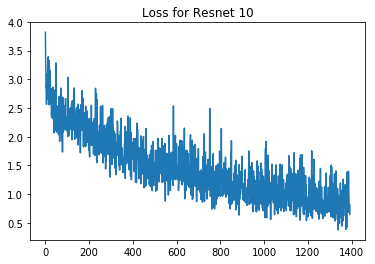

In [21]:
plt.plot( np.arange(0, len(lossplot)), lossplot)
plt.title("Loss for Resnet 10")

In [22]:
accplot = np.load('/Users/arushigupta/Desktop/accs.npy')

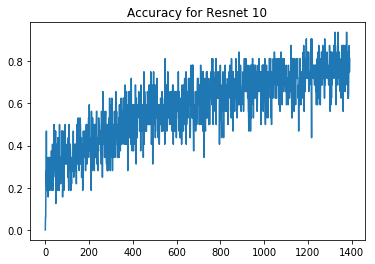

In [23]:
plt.plot(np.arange(0, len(accplot)), accplot)
plt.title("Accuracy for Resnet 10")

In [16]:
model = load_model('/Users/arushigupta/Desktop/iam_model.h5')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/engine/topology.py:1269: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  return cls(**config)


In [17]:
test_words = np.load('/Users/arushigupta/Desktop/test_words.npy')
test_ys =np.load('/Users/arushigupta/Desktop/test_ys.npy')

In [18]:
test_words

array([['is'],
       ['to'],
       ['of'],
       ...,
       ['I'],
       ['that'],
       ['to']], dtype='<U5')

In [ ]:
#so now for each test word we want to predict its value
i = 0
test_acc = 0
for loc in test_ys:
    first_im = loc[0]
    img = misc.imread(first_im)
    lab = test_words[i][0]
    im_w = np.shape(img)[0]
    im_h = np.shape(img)[1]
    pad_0_l = ceil((max_width - im_w)/2.0)
    pad_0_r = floor((max_width - im_w)/2.0)
    pad_1_l  = ceil((max_height - im_h)/2.0)
    pad_1_r = floor((max_height - im_h)/2.0)
    padded_img =  np.pad(img, [(pad_0_l, pad_0_r),(pad_1_l, pad_1_r)], mode = 'constant', constant_values = 0)
    probs = model.predict(np.reshape( padded_img, (1, 231, 1934, 1)) )
    prediction = np.argmax(probs)
    if prediction == hot_ind[lab]:
        test_acc += 1
    i += 1
    
print(1.0*test_acc/len(test_ys))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [70]:
print(np.shape(padded_img))

(231, 1934)


In [74]:
probs = model.predict(np.reshape( padded_img, (1, 231, 1934, 1)) )
prediction = np.argmax(probs)
prediction

14

In [76]:
hot_ind[lab]

2

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


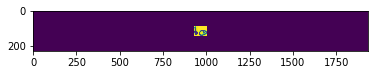

In [80]:
first_im = test_ys[1][0]
img = misc.imread(first_im)
plt.imshow(img)
im_w = np.shape(img)[0]
im_h = np.shape(img)[1]
pad_0_l = ceil((max_width - im_w)/2.0)
pad_0_r = floor((max_width - im_w)/2.0)
pad_1_l  = ceil((max_height - im_h)/2.0)
pad_1_r = floor((max_height - im_h)/2.0)
padded_img =  np.pad(img, [(pad_0_l, pad_0_r),(pad_1_l, pad_1_r)], mode = 'constant', constant_values = 0)
plt.imshow(padded_img)

In [101]:
inp = Input(shape=(max_width,max_height,1))
i = inp

i = Conv2D(16, (3,3) , padding='same')(i)
i = Activation('relu')(i)
i = MaxPooling2D((2,2))(i)
i = Conv2D(32, (3,3) , padding='same')(i)
i = Activation('relu') (i)
i = MaxPooling2D((2,2))(i)
i = Conv2D(64, (3,3) , padding='same')(i)
i = Activation('relu') (i)
i = MaxPooling2D((2,2))(i)
i = Flatten() (i)
i = Dense(500)(i)
i = Activation('relu')(i)
i = Dense(26)(i)
i = Activation('softmax')(i)
modelII = Model(input=inp,output=i)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`


In [102]:
modelII.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 231, 1934, 1)      0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 231, 1934, 16)     160       
_________________________________________________________________
activation_59 (Activation)   (None, 231, 1934, 16)     0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 115, 967, 16)      0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 115, 967, 32)      4640      
_________________________________________________________________
activation_60 (Activation)   (None, 115, 967, 32)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 57, 483, 32)       0         
__________

In [103]:
opt = Adam(lr = 0.0001)
modelII.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [104]:
#modelII = load_model('/Users/arushigupta/Desktop/iam_model.h5')
lossesII = [ ]
accsII =  [ ]
for i in range(0, 100000000):
    print(i)
    x_t, y_t = next(data_gen)
    history = modelII.fit(x_t, y_t, batch_size = 32)
    lossesII.append(history.history['loss'][0])
    accsII.append(history.history['acc'][0])
    
    if i % 20 == 0:
        modelII.save('/Users/arushigupta/Desktop/iam_modelII.h5')
        np.save('/Users/arushigupta/Desktop/lossesII', lossesII)
        np.save('/Users/arushigupta/Desktop/accsII', accsII)

0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


Epoch 1/1
32/32 [==============================] - 80s 2s/step - loss: 9.1046 - acc: 0.0000e+00
1
Epoch 1/1
32/32 [==============================] - 21s 651ms/step - loss: 10.2179 - acc: 0.1875
2
Epoch 1/1
32/32 [==============================] - 16s 513ms/step - loss: 11.1156 - acc: 0.2812
3
Epoch 1/1
32/32 [==============================] - 12s 380ms/step - loss: 12.9805 - acc: 0.1875
4
Epoch 1/1
32/32 [==============================] - 11s 330ms/step - loss: 11.0452 - acc: 0.3125
5
Epoch 1/1
32/32 [==============================] - 11s 329ms/step - loss: 13.0798 - acc: 0.1875
6
Epoch 1/1
32/32 [==============================] - 10s 328ms/step - loss: 11.0812 - acc: 0.3125
7
Epoch 1/1
32/32 [==============================] - 16s 506ms/step - loss: 10.4857 - acc: 0.3438
8
Epoch 1/1
32/32 [==============================] - 13s 396ms/step - loss: 13.4330 - acc: 0.0938
9
Epoch 1/1
32/32 [==============================] - 12s 369ms/step - loss: 13.0960 - acc: 0.1875
10
Epoch 1/1
32/32 [==

84
Epoch 1/1
32/32 [==============================] - 11s 343ms/step - loss: 12.0887 - acc: 0.2500
85
Epoch 1/1
32/32 [==============================] - 10s 311ms/step - loss: 10.5775 - acc: 0.3438
86
Epoch 1/1
32/32 [==============================] - 10s 321ms/step - loss: 10.5775 - acc: 0.3438
87
Epoch 1/1
32/32 [==============================] - 10s 305ms/step - loss: 13.3153 - acc: 0.1562
88
Epoch 1/1
32/32 [==============================] - 16s 488ms/step - loss: 12.0899 - acc: 0.2500
89
Epoch 1/1
32/32 [==============================] - 11s 340ms/step - loss: 12.5923 - acc: 0.2188
90
Epoch 1/1
32/32 [==============================] - 9s 275ms/step - loss: 12.5923 - acc: 0.2188
91
Epoch 1/1
32/32 [==============================] - 9s 296ms/step - loss: 12.0887 - acc: 0.2500
92
Epoch 1/1
32/32 [==============================] - 29s 913ms/step - loss: 11.5849 - acc: 0.2812
93
Epoch 1/1
32/32 [==============================] - 53s 2s/step - loss: 10.7674 - acc: 0.3125
94
Epoch 1/1
32

167
Epoch 1/1
32/32 [==============================] - 7s 217ms/step - loss: 14.6780 - acc: 0.0625
168
Epoch 1/1
32/32 [==============================] - 7s 220ms/step - loss: 12.0886 - acc: 0.2500
169
Epoch 1/1
32/32 [==============================] - 7s 219ms/step - loss: 10.8452 - acc: 0.3125
170
Epoch 1/1
32/32 [==============================] - 7s 223ms/step - loss: 10.9463 - acc: 0.3125
171
Epoch 1/1
32/32 [==============================] - 7s 219ms/step - loss: 9.5989 - acc: 0.3750
172
Epoch 1/1
32/32 [==============================] - 7s 219ms/step - loss: 11.3283 - acc: 0.2812
173
Epoch 1/1
32/32 [==============================] - 7s 220ms/step - loss: 10.3878 - acc: 0.3438
174
Epoch 1/1
32/32 [==============================] - 7s 221ms/step - loss: 10.6027 - acc: 0.3125
175
Epoch 1/1
32/32 [==============================] - 7s 223ms/step - loss: 13.5996 - acc: 0.1562
176
Epoch 1/1
32/32 [==============================] - 7s 226ms/step - loss: 9.9339 - acc: 0.3750
177
Epoch 1/

250
Epoch 1/1
32/32 [==============================] - 8s 244ms/step - loss: 10.0747 - acc: 0.3750
251
Epoch 1/1
32/32 [==============================] - 8s 241ms/step - loss: 10.6054 - acc: 0.3125
252
Epoch 1/1
32/32 [==============================] - 8s 245ms/step - loss: 13.8217 - acc: 0.1250
253
Epoch 1/1
32/32 [==============================] - 8s 244ms/step - loss: 9.1122 - acc: 0.4062
254
Epoch 1/1
32/32 [==============================] - 8s 243ms/step - loss: 6.7736 - acc: 0.5312
255
Epoch 1/1
32/32 [==============================] - 7s 219ms/step - loss: 10.5839 - acc: 0.3438
256
Epoch 1/1
32/32 [==============================] - 7s 220ms/step - loss: 9.5856 - acc: 0.3750
257
Epoch 1/1
32/32 [==============================] - 8s 241ms/step - loss: 12.0886 - acc: 0.2500
258
Epoch 1/1
32/32 [==============================] - 7s 220ms/step - loss: 10.5777 - acc: 0.3438
259
Epoch 1/1
32/32 [==============================] - 8s 238ms/step - loss: 11.0720 - acc: 0.2812
260
Epoch 1/1

334
Epoch 1/1
32/32 [==============================] - 8s 245ms/step - loss: 4.1635 - acc: 0.1562
335
Epoch 1/1
32/32 [==============================] - 8s 242ms/step - loss: 4.8236 - acc: 0.2812
336
Epoch 1/1
32/32 [==============================] - 8s 246ms/step - loss: 2.8069 - acc: 0.3750
337
Epoch 1/1
32/32 [==============================] - 8s 243ms/step - loss: 3.3323 - acc: 0.3125
338
Epoch 1/1
32/32 [==============================] - 8s 246ms/step - loss: 3.7222 - acc: 0.2812
339
Epoch 1/1
32/32 [==============================] - 8s 240ms/step - loss: 2.7609 - acc: 0.4062
340
Epoch 1/1
32/32 [==============================] - 8s 237ms/step - loss: 2.9333 - acc: 0.3438
341
Epoch 1/1
32/32 [==============================] - 8s 251ms/step - loss: 3.4464 - acc: 0.2812
342
Epoch 1/1
32/32 [==============================] - 8s 237ms/step - loss: 3.2737 - acc: 0.2500
343
Epoch 1/1
32/32 [==============================] - 8s 238ms/step - loss: 2.6516 - acc: 0.3750
344
Epoch 1/1
32/32 

418
Epoch 1/1
32/32 [==============================] - 7s 224ms/step - loss: 1.7732 - acc: 0.5625
419
Epoch 1/1
32/32 [==============================] - 8s 238ms/step - loss: 2.7959 - acc: 0.2812
420
Epoch 1/1
32/32 [==============================] - 7s 223ms/step - loss: 2.0074 - acc: 0.4375
421
Epoch 1/1
32/32 [==============================] - 8s 252ms/step - loss: 2.0358 - acc: 0.3750
422
Epoch 1/1
32/32 [==============================] - 7s 229ms/step - loss: 2.0481 - acc: 0.2812
423
Epoch 1/1
32/32 [==============================] - 7s 222ms/step - loss: 1.5989 - acc: 0.5625
424
Epoch 1/1
32/32 [==============================] - 7s 219ms/step - loss: 1.6928 - acc: 0.5625
425
Epoch 1/1
32/32 [==============================] - 7s 220ms/step - loss: 1.9557 - acc: 0.3125
426
Epoch 1/1
32/32 [==============================] - 8s 234ms/step - loss: 1.5539 - acc: 0.5938
427
Epoch 1/1
32/32 [==============================] - 7s 222ms/step - loss: 2.1061 - acc: 0.3125
428
Epoch 1/1
32/32 

502
Epoch 1/1
32/32 [==============================] - 7s 228ms/step - loss: 1.7607 - acc: 0.6250
503
Epoch 1/1
32/32 [==============================] - 7s 233ms/step - loss: 1.2788 - acc: 0.6250
504
Epoch 1/1
32/32 [==============================] - 7s 218ms/step - loss: 1.9022 - acc: 0.4062
505
Epoch 1/1
32/32 [==============================] - 8s 240ms/step - loss: 1.6853 - acc: 0.5938
506
Epoch 1/1
32/32 [==============================] - 8s 242ms/step - loss: 1.1991 - acc: 0.7188
507
Epoch 1/1
32/32 [==============================] - 8s 239ms/step - loss: 1.5609 - acc: 0.4062
508
Epoch 1/1
32/32 [==============================] - 7s 219ms/step - loss: 1.5183 - acc: 0.4062
509
Epoch 1/1
32/32 [==============================] - 7s 230ms/step - loss: 2.0726 - acc: 0.5312
510
Epoch 1/1
32/32 [==============================] - 7s 229ms/step - loss: 1.8381 - acc: 0.4688
511
Epoch 1/1
32/32 [==============================] - 7s 220ms/step - loss: 1.2438 - acc: 0.6250
512
Epoch 1/1
32/32 

586
Epoch 1/1
32/32 [==============================] - 7s 228ms/step - loss: 1.2495 - acc: 0.5625
587
Epoch 1/1
32/32 [==============================] - 7s 217ms/step - loss: 1.6705 - acc: 0.5625
588
Epoch 1/1
32/32 [==============================] - 7s 219ms/step - loss: 1.0462 - acc: 0.6875
589
Epoch 1/1
32/32 [==============================] - 7s 218ms/step - loss: 1.1290 - acc: 0.6875
590
Epoch 1/1
32/32 [==============================] - 7s 224ms/step - loss: 2.0893 - acc: 0.3438
591
Epoch 1/1
32/32 [==============================] - 7s 221ms/step - loss: 1.2951 - acc: 0.6562
592
Epoch 1/1
32/32 [==============================] - 7s 221ms/step - loss: 1.6580 - acc: 0.5000
593
Epoch 1/1
32/32 [==============================] - 7s 216ms/step - loss: 1.1220 - acc: 0.6562
594
Epoch 1/1
32/32 [==============================] - 7s 219ms/step - loss: 0.8840 - acc: 0.7812
595
Epoch 1/1
32/32 [==============================] - 7s 220ms/step - loss: 1.3026 - acc: 0.5938
596
Epoch 1/1
32/32 

670
Epoch 1/1
32/32 [==============================] - 8s 239ms/step - loss: 1.1540 - acc: 0.7188
671
Epoch 1/1
32/32 [==============================] - 7s 223ms/step - loss: 1.6910 - acc: 0.5312
672
Epoch 1/1
32/32 [==============================] - 8s 248ms/step - loss: 1.1697 - acc: 0.6875
673
Epoch 1/1
32/32 [==============================] - 7s 229ms/step - loss: 1.4491 - acc: 0.5625
674
Epoch 1/1
32/32 [==============================] - 7s 224ms/step - loss: 1.4062 - acc: 0.6875
675
Epoch 1/1
32/32 [==============================] - 7s 221ms/step - loss: 1.2677 - acc: 0.6562
676
Epoch 1/1
32/32 [==============================] - 7s 225ms/step - loss: 1.2034 - acc: 0.7188
677
Epoch 1/1
32/32 [==============================] - 8s 240ms/step - loss: 1.0611 - acc: 0.7500
678
Epoch 1/1
32/32 [==============================] - 8s 242ms/step - loss: 1.0324 - acc: 0.7500
679
Epoch 1/1
32/32 [==============================] - 7s 217ms/step - loss: 0.9213 - acc: 0.7812
680
Epoch 1/1
32/32 

ValueError: cannot reshape array of size 26805240 into shape (32,231,1934,1)

In [105]:
len(train_ys)

22652

In [106]:
26805240/231.0


116040.0

In [107]:
116040/1934.0

60.0

In [108]:
60/32.0

1.875

In [ ]:
i = 0
test_accII = 0
for loc in test_ys:
    first_im = loc[0]
    img = misc.imread(first_im)
    lab = test_words[i][0]
    im_w = np.shape(img)[0]
    im_h = np.shape(img)[1]
    pad_0_l = ceil((max_width - im_w)/2.0)
    pad_0_r = floor((max_width - im_w)/2.0)
    pad_1_l  = ceil((max_height - im_h)/2.0)
    pad_1_r = floor((max_height - im_h)/2.0)
    padded_img =  np.pad(img, [(pad_0_l, pad_0_r),(pad_1_l, pad_1_r)], mode = 'constant', constant_values = 0)
    probs = modelII.predict(np.reshape( padded_img, (1, 231, 1934, 1)) )
    prediction = np.argmax(probs)
    if prediction == hot_ind[lab]:
        test_accII += 1
    i += 1
    
print(1.0*test_accII/len(test_ys))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


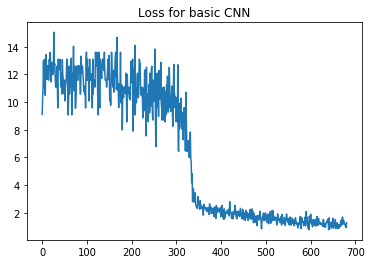

In [109]:
lossplotII = np.load('/Users/arushigupta/Desktop/lossesII.npy')
plt.plot( np.arange(0, len(lossplotII)), lossplotII)
plt.title("Loss for basic CNN")

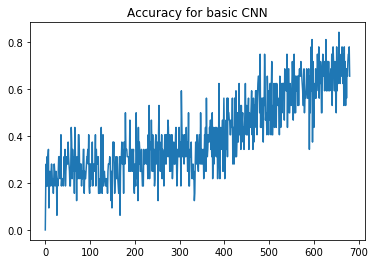

In [110]:
lossplotII = np.load('/Users/arushigupta/Desktop/accsII.npy')
plt.plot( np.arange(0, len(lossplotII)), lossplotII)
plt.title("Accuracy for basic CNN")